<a href="https://colab.research.google.com/github/wlghksx/Deep-Learning-from-Scratch/blob/main/%EB%B0%91%EB%B0%94%EB%8B%A5%EB%B6%80%ED%84%B0_%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94_%EB%94%A5%EB%9F%AC%EB%8B%9D_1_Chapter_3_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.2.2 계단 함수 구현하기

In [ ]:
def step_function(x) :
  if x>0 :
    return 1
  else:
    return 0

이것이 이전의 장까지 적용되던 퍼셉트론에 적용되던 알고리즘이다.

하지만 이는 numpy 배열을 인수로 받아들이 수 없으므로 바꿔준다면.

In [ ]:
import numpy as np

def step_function(x) :
  y = x>0
  return y.astype(np.int)

In [ ]:
x = np.array([-1.0,1.0,2.0])
x


array([False,  True,  True])

In [ ]:
y = x>0
y

array([False,  True,  True])

하지만 우리가 원하는 것은 bool배열이 아닌 int형을 출력해주는 것이기 때문에, 바꿔준다.


In [ ]:
y = y.astype(np.int)
y

array([0, 1, 1])

## 계단함수 그래프

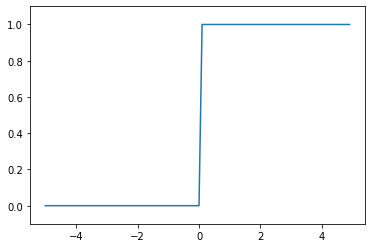

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(-5.0,5.0,0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

## 시그모이드 함수 구현

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

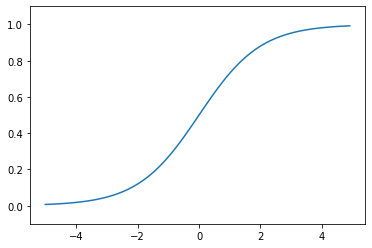

In [ ]:
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

- 활성화함수를 계단함수가 아닌 시그모이드 함수를 사용함으로써 활성화 값에 연속적인 실수를 갖게 할 수 있다.
- 공통점은 입력이 작을 때는 출력이 0에 가깝고, 클 떄는 출력이 1에 가깝다는 점.
- 또한 입력이 아무리 작거나 커도 0과 1사이이다.

## 3.2.6 비선형 함수

- 신경망에서는 활성화 함수로 선형함수가 아닌 비선형 함수를 주로 사용한다.
- 왜냐하면, 선형함수를 이용하면 층을 깊게하는 이유가 사라진다.
- 즉, 선형함수의 문제점은 층을 아무리 깊게해도 은닉층이 없는 네트워크로도 똑같은 기능을 할 수 있다.
- h(x) = cx 를 활성화 함수로 사용한 3층 네트워크 를 생각해보자면 ,
y(x) = h(h(h(x))) 가 된다. 즉 y = c * c * c * x 처럼 곱셈을 여러번 하지만 실제로는 y = ax와 같은 식이 된다.


## ReLU 함수

- 최근에 많이 사용하는 활성화 함수이다.
- 입력이 0을 넘으면 입력을 그대로 출력, 0 이하면 0을 출력

In [ ]:
def relu(x) :
  return np.maximum(0,x)

# 3.3 다차원 배열의 계산

넘파이의 다차원 배열을 사용한 계산을 숙달하면 신경망을 효율적으로 구현할 수 있기 때문에 이번 절에서는 넘파이의 다차원 배열 계산에 대해 설명한 뒤 신경망 구현을 시현

## 3.3.1 다차원 배열

In [ ]:
import numpy as np
A = np.array([1,2,3,4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [ ]:
B = np.array([[1,2],[3,4],[5,6]])

print(B)
print(np.ndim(B)) # 2차원 배열
print(B.shape) # 3행 2열

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


## 3.3.2 행렬의 곱

In [ ]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])

np.dot(A,B) # A의 1행 B의 1열의 곱이 결과의 1행 1열의 값이 된다.

array([[19, 22],
       [43, 50]])

- 행렬의 곱은 행령의 형상에 주의해야 한다.
- 즉, A의 1번째 차원의 원소 수(열 수)와 행렬 B의 0번쨰 차원의 원소 수(행 수) 가 같지 않으면 곱셈이 불가하다.

- 즉 A(3 * 2) 행렬과 B(2 * 4) 행렬의 곱은 C(3 * 4) 행렬이 된다.

## 3.4.2 각 층의 신호 전달 구현하기

In [ ]:
X = np.array([1.0,0.5])
w1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

print(w1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X,w1) +B1
print(A1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]


- 위의 과정이 신경망의 히든레이어 1층의 첫번째 뉴런에 입력층의 (입력2 + bias) 3가지 입력이 가중치(w1)가 곱해져서 전해지는 과정이다.

In [ ]:
Z1 = sigmoid(A1)
print(Z1)

[0.57444252 0.66818777 0.75026011]


- 위에서 정의했었던 시그모이드 함수에 A1을 대입해준 값인 Z1이 결국 첫번쨰 히든레이어 1번 노드에 입력되는 최종 활성화 값이다.

- 여기서는 마지막 출력층의 활성화 함수를 identity_function(x) 을 정의하여 기존의 히든레이어의 활성화 함수와 다름을 표시해줬다.
- 그렇다면 왜 출력층은 활성화 함수가 달라야할까? 어떻게 다를까?
- 출력층의 활성화 함수는 풀고자 하는 문제에 따라 정한다. 회귀에서는 항등함수, 2클래스 분류에는 시그모이드, 다중 클래스 분류에는 소프트맥스 함수를 사용하곤 한다. 다음에 더 자세히 다루도록 하겠다.

# 3.5 출력층  설계하기
## 3.5.1 항등 함수와 소프트맥스 함수 구현하기

- softmax 함수 식

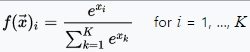

K = 출력층의 뉴런 수

k = 그중 k번째 출력임을 뜻한다.

a^k = k번째 뉴런에 들어가는 입력신호


In [ ]:
a = np.array([0.3,2.9,4.0])

exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


## 그럼 소프트맥스 함수 알고리즘을 구현해보겠습니다.

In [ ]:
def softmax(a) :
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

## 3.5.2 Softmax 함수 구현 시 주의할 점

소프트 맥스 함수를 계산할 때 주의해야 할 점은 오버플로 문제이다.

소프트맥스 함수는 지수함수를 사용하는데, 지수 함수는 아주 큰 값을 출력하기 때문에, e^1000 같은 경우는 무한대를 뜻하는 inf가 되어 돌아오기도 한다.
그리고, 이런 큰 값끼리 나눗셈을 하는 경우에는 불안정한 결과를 출력하게 된다.

이 문제를 해결하기 위해서 소프트맥스 함수를 개선해보도록 하겠다.

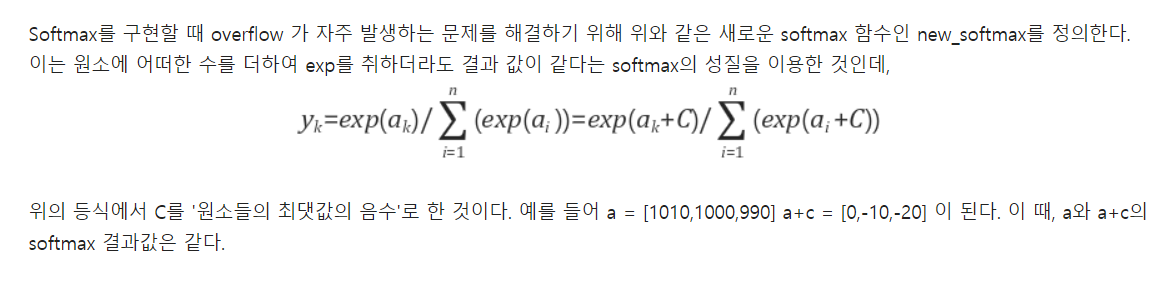

In [ ]:
a = np.array([1010,1000,990])
print(np.exp(a) / np.sum(np.exp(a)))

c = np.max(a)
print(np.exp(a-c) / np.sum(np.exp(a-c)))


[nan nan nan]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


- 따라서 이전에 정의했던 softmax(a) 함수를 이와 같이 오버플로우를 방지하기 위해 재정의해준다.

In [ ]:
def softmax(a) :
  c = np.max(a)
  exp_a = np.exp(a-c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y



## 3.5.3 소프트맥스 함수의 특징

In [ ]:
a = np.array([0.3,2.9,4.0])
y = softmax(a)

print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


- 소프트맥스 함수의 출력은 0~1 사이의 값이다
**소프트맥스 함수의 출력의 총합은 1이다.**

이러한 성질 덕분에 출력값을 확률로 해석할 수 있다.
소프트맥스 함수를 이용함으로써 문제를 확률적으로 대응할 수 있게 된 것이다.

하지만 신경망을 이용한 분류 문제에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식한다. 그리고 소프트 맥스 함수를 적용해도 가장 큰 뉴런의 위치는 달라지지 않기 때문에 

분류를 위해서라면 추론단계에서는 소프트맥스 함수를 생략하는 것도 계산적 이로움을 줄 수 있다.

추론단계란 학습단계가 아닌 이미 학습된 모델로 미지의 데이터에 대하여 추론(분류)를 수행함을 의미한다.


# 3.6 손글씨 숫자 인식

- 이번 절에서는 이미 학습된 모델을 이용하여 학습 과정을 생략하고, 추론과정만 구현한다. 이 추론 과정을 신경망의 순전파(Forward propagation)라고도 한다.

## 3.6.1 MNIST 데이터셋

- 코랩은 로컬환경과 연결되어 있지 않기 때문에 직접 파일을 설정하여 연결해준 후 함수를 사용하여야 한다. 그 방법이 아래와 같다.

In [56]:
from google.colab import files
src = list(files.upload().values())[0]
open('file1.py','wb').write(src)
import file1

Saving mnist.py to mnist.py


In [59]:
(x_train, t_train), (x_test,t_test) = file1.load_mnist(flatten = True, normalize = False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)


Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


- load_mnist 에는 인수가 3가지가 있다.
1. normalize (bool) : 입력 이미지의 픽셀 값을 0~1사이로 정규화할지 설정하는 것.
2. flatten(bool) : 입력 이미지를 평탄하게, 즉 1차원 배열로 만들지 설정하는 것.
3. one_hot_incoding : 레이블을 원핫인코딩형태로 저장할지 아니면 레이블 그대로 저장할지.



In [65]:
import sys, os
import numpy as np
from PIL import Image # 이미지 표시를 위해 사용하는 모듈

def img_show(img) :
  pil_img = Image.fromarray(np.uint8(img))
  pil_img.show()

(x_train, t_train), (x_test,t_test) = file1.load_mnist(flatten = True, normalize = False)

img = x_train[0] # 첫번째 이미지 지정
label = t_train[0] # 첫번째 이미지의 라벨 지정
print(label)

print(img.shape)

img = img.reshape(28,28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


## 3.6.2 신경망의 추론 처리

- 입력층 뉴런 784개 (이미지가 28 *28 = 784 크기이기 떄문에)
- 출력층 뉴런 10개 (0~9의 10개의 숫자를 구분하는 문제이기 때문에)
- 은닉층은 총 2개로 첫번째 은닉층에는 50개의 뉴런을, 두번째 은닉층에는 100개의 뉴런을 배치할 것이다. 50과 100은 임의의 숫자


In [70]:
from google.colab import files
uploaded = files.upload()

Saving sample_weight.pkl to sample_weight.pkl


In [73]:
def get_data() :
  (x_train, t_train), (x_test,t_test) = file1.load_mnist(flatten = True, normalize = True, one_hot_label = False)
  return x_test, t_test

def init_network():
  import pickle
  with open("sample_weight.pkl", 'rb') as f:
    network = pickle.load(f)

  return network

def predict(network,x) :
  W1,W2,W3 = network['W1'] , network['W2'], network['W3']
  b1,b2,b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x,W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1,W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2,W3) + b3
  y = sigmoid(a3)
  
  return y

- init_network () 파일에서는 pickle 파일인 sample_weight.pkl 에 저장된 학습된 가중치 매개변수 를 읽어온다. 이 파일에는 가중치와 bias 매개변수가 변수로 저장되어 있다. 이 함수를 가지고 추론을 하고 acc를 구해보겠습니다.

In [74]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
  y = predict(network,x[i])
  p = np.argmax(y)
  if p == t[i] :
    accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt)/len(x)))


Accuracy:0.9352


- 먼저 MNIST 데이터 셋을 얻고 네트워크를 형성한다. 이어서 for 문을 돌며 x에 저장된 이미지를 꺼내 predict 함수로 분류한다. predict 함수는 각 레이블의 확률을 넘파이 배열로 반환하므로, 그 다음 np.argmax()함수로 이 배열에서 가장 큰 원소의 인덱스를 구하면 그 인덱스가 예측 결과 label이 된다. 이러한 예측결과 label과 정답 label을 비교하여 맞힌 숫자 acc_cnt를 세고 이를 전체 이미지 숫자로 나눠 정확도를 구한다.

- 또한 이 예시에서는 load_mnist 함수의 인수인 normalize 를 True로  설정하여 0~255 범위의 값을 255로 나눠서 0~1값으로 변환하였는데 이처럼 특정 범위의 데이터를 변환하는 처리를 **정규화(normalization)** 라 하고 신경망의 입력 데이터에 특정 변환을 가하는 것을 전처리(pre-processing)이라 한다.

- 여기서는 255로 나누는 단순한 정규화를 수행하였지만, 현업에서는 데이터 전체의 분포를 고려해 전처리하는 경우가 많다. 예를 들어, 데이터 전체 평균과 표준편차를 이용하여 데이터들이 0을 중심으로 분포할 수 있도록 데이터의 확산범위를 제한하는 정규화를 수행한다. 그 외에도 전체 데이터를 균일하게 분포시키는 데이터 백색화(whitening)도 있다.

## 3.6.3 배치 처리

In [75]:
x, _ = get_data()
network = init_network()
W1,W2,W3 = network['W1'] , network['W2'], network['W3']

print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(784,)
(784, 50)
(50, 100)
(100, 10)


- 이처럼 다차원 배열의 대응하는 차원의 수가 일치하는 것을 볼 수 있다.
- 784-784, 50-50, 100-100 
- 결국 데이터 한장이 입력되었을 때 원소 784개로 구성된 1차원 배열이 입력되어 원소가 10개인 1차원 배열이 출력되는 구조이다.


그렇다면 여러장을 한꺼번에 입력하는 경우를 생각해보자.

이미지 100개를 묶어 predict() 함수에 넘긴다면? 

x의 형상을 100*784로 바꿔서 100장 분량의 데이터를 하나의 입력 데이터로 표현하면 될 것이다. 

그러면 최종 출력이 100*10이 나올 것이다.
결국에는 x[0] y[0] 에는 0번째 이미지와 그 추론 결과가
x[1]과 y[1]에는 1번째 이미지와 그 추론 결과가 들어있을 것이다.

- 이처럼 하나로 묶은 입력 데이터를 **배치**라고 한다.

배치를 사용할 때의 장점은 
1. 하나의 수치 계산 라이브러리 대부분이 큰 배열을 효율적으로 처리할 수 있도록 고도로 최적화되어 있기 때문이다. 
2. 큰 신경망에서는 데이터 전송이 병목적으로 작용하는 경우가 종종 있는데, 이를 배치 처리함으로써 부하를 줄일 수 있다.(데이터를 읽는 횟수가 줄고, 빠른 CPU나 GPU로 순수 계산을 수행하는 비율이 늘어나 상대적으로 빠르게 느껴지는 것.)

### 배치처리 구현

In [76]:
x, t = get_data()
network = init_network()

batch_size = 100 # 배치크기
accuracy_cnt = 0

for i in range(0,len(x),batch_size) :
  x_batch = x[i:i+batch_size]
  y_batch = predict(network,x_batch)
  p = np.argmax(y_batch,axis =1)
  accuracy_cnt += np.sum( p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))


Accuracy:0.9352


- range 함수를 range(0,len(x),batch_size) 이처럼 사용하게 되면 batch_size 만큼의 step으로 for문을 수행하게 된다.
- axis = 1 은 첫번쨰 차원을 축으로 최댓값을 찾도록 한 것이다. 즉 0번쨰 인덱스 내에서 가장 큰 값을 찾게 한 것이다. 그러므로 각 이미지 내에서 가장 큰 값을 가지는 것의 label을 갖고오게 된다.